In [1]:
import numpy as np
import pandas as pd
import sys
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesClassifier
#from feature_vector import gen_test, gen_train
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
from IPython.display import clear_output
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
clear_output()
#svm and with cross validation
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from IPython.display import clear_output
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import numpy.ma as ma
import warnings
warnings.filterwarnings("ignore")
clear_output()

In [2]:
def svm_lanth(A,B):
    x_train, x_test, y_train, y_test = train_test_split(
                                       A, B.iloc[:],test_size=0.2)
    rows=np.shape(x_test)[0]
    
    ytest_clf=np.zeros((rows,1))
    
    tuned_parameters = [  {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]}]

    

    # Tuning the relevant hyper paramters
    clf=GridSearchCV(SVR(),tuned_parameters,scoring="neg_mean_squared_error")
    clf.fit(x_train, y_train)
    best_param=clf.cv_results_['params'][clf.best_index_]
    
    tlf = svm.SVR(kernel='rbf',C=best_param['C'],gamma=best_param['gamma'])
    tlf=tlf.fit(x_train,y_train.iloc[:])
    
    # Fitting the model
    ytest_clf[:,0]=tlf.predict(x_test)
    
    return(np.mean((ytest_clf-y_test)**2)) 
  

def kernel_rid_lanth(A,B):
    x_train, x_test, y_train, y_test = train_test_split(
                                       A, B.iloc[:],test_size=0.2)
    rows=np.shape(x_test)[0]
    
    ytest_clf=np.zeros((rows,1))
    
    tuned_parameters = {"alpha":[0.1,0.001,0.00001],"kernel":["rbf","linear","polynomial"],
            "gamma": [1e-3, 1e-4]}

   

    # Tuning the relevant hyper paramters
    clf=GridSearchCV(KernelRidge(),tuned_parameters,scoring="neg_mean_squared_error").fit(x_train, np.array(y_train)[:,0])#fit(A, B.iloc[:])
    clf=clf.fit(x_train, np.array(y_train)[:,0])
    best_param=clf.cv_results_['params'][clf.best_index_]
    
    tlf=KernelRidge(kernel=best_param['kernel'],alpha=best_param['alpha'],gamma=best_param['gamma'])
    tlf=tlf.fit(x_train, np.array(y_train)[:,0])
    
    # Fitting the model
    ytest_clf[:,0]=tlf.predict(x_test)
    
    return(np.mean((ytest_clf-y_test)**2))
    

def neural_net_lanth(A,B):
    x_train, x_test, y_train, y_test = train_test_split(
                                       A, B.iloc[:],test_size=0.2)
    rows=np.shape(x_test)[0]
    
    ytest_clf=np.zeros((rows,1))
    
    tuned_parameters = {"activation": ["logistic"],
               "solver":["lbfgs"],
               "hidden_layer_sizes":[10,20,30,40,50],
               "alpha":[0.001], "learning_rate":["constant"]}
    

    clf=GridSearchCV(MLPRegressor(), tuned_parameters,scoring="neg_mean_squared_error")
    clf=clf.fit(x_train,y_train)
    best_param=clf.cv_results_['params'][clf.best_index_]
    
    
    tlf = MLPRegressor(alpha=best_param['alpha'],hidden_layer_sizes=best_param['hidden_layer_sizes'],activation='identity', solver='lbfgs',learning_rate='constant')
    tlf=tlf.fit(x_train,y_train)
    
    # Fitting the model
    ytest_clf[:,0]=tlf.predict(x_test)
    
    return(np.mean((ytest_clf-y_test)**2))


def random_forest_lanth(A,B):
    x_train, x_test, y_train, y_test = train_test_split(A, B.iloc[:],test_size=0.2)
    rows=np.shape(x_test)[0]
    
    ytest_clf=np.zeros((rows,1))
    
    tuned_parameters = [  {"n_estimators": [20,40,80,100], "criterion": ["squared_error"], "max_samples": [100, 200]}]

    # Tuning the model
    clf=GridSearchCV(RandomForestRegressor(),tuned_parameters,scoring="neg_mean_squared_error")
    clf=clf.fit(x_train,y_train)
    best_param=clf.cv_results_['params'][clf.best_index_]
    
    tlf = RandomForestRegressor(n_estimators=best_param['n_estimators'],criterion=best_param['criterion'],max_samples=best_param['max_samples'])
    tlf=tlf.fit(x_train,y_train)
    
    # Fitting the model
    ytest_clf[:,0]=tlf.predict(x_test)
    return(np.mean((ytest_clf-y_test)**2)) 
    
    
    

In [12]:
grp_vect=pd.read_csv('/Users/sampreetibhattacharya/Documents/vestalab/ML_proj/group_vect.csv')
ytr_scaled=pd.read_csv('/Users/sampreetibhattacharya/Documents/vestalab/ML_proj/Ytr.csv')
y_hull=pd.read_csv('/Users/sampreetibhattacharya/Documents/vestalab/ML_proj/Y_new_Ehull.csv')
y_form=pd.read_csv('/Users/sampreetibhattacharya/Documents/vestalab/ML_proj/Y_new_form.csv')

ytsc=pd.DataFrame(np.matrix(ytr_scaled.iloc[:,1:]),columns=ytr_scaled.columns[1:])
yhull=pd.DataFrame(np.matrix(y_hull.iloc[:,1:]),columns=y_hull.columns[1:])
yform=pd.DataFrame(np.matrix(y_form.iloc[:,1:]),columns=y_form.columns[1:])

error_vec_hull=np.zeros((20,4)) #initialize the error matrix for four methods at a time
error_vec_form=np.zeros((20,4))

result=np.zeros((20,8))

# for  form energies
scaler = preprocessing.StandardScaler().fit(yform) # This is used to scale the data since the data values differe
y_scaled_form=scaler.transform(yform) #form or hull
ind=np.array(np.where(True))  # the number to compare depends which are you comparing with 4 for hull
ynew_scaled_form=pd.DataFrame(y_scaled_form).drop(labels=ind[0],axis=0)

## for hull energies
scaler = preprocessing.StandardScaler().fit(yhull) # This is used to scale the data since the data values differe
y_scaled_hull=scaler.transform(yhull) 
ind=np.array(np.where(True))  # the number to compare depends which are you comparing with 4 for hull
ynew_scaled_hull=pd.DataFrame(y_scaled_hull).drop(labels=ind[0],axis=0)


# scoop out the indices from the respective feature matrix and the group vector
ytsc_new=pd.DataFrame(ytsc.drop(labels=ind[0],axis=0))
grp_vect_new=pd.DataFrame(grp_vect.drop(labels=ind[0],axis=0))




################### This part is to run and get the errors from various methods and to conclude which method should be used for final part
# running 20 times for reproducibility

scaler = preprocessing.MinMaxScaler().fit(ytsc_new.iloc[:,:])
ytsc_new=pd.DataFrame(scaler.transform(ytsc_new.iloc[:,:]),columns=ytsc_new.columns)


for j in range(0,20): ## Getting the model
   
    pred_mat_nl=pd.DataFrame(np.append(np.matrix(ytsc_new.iloc[:,1:]),grp_vect_new.iloc[:,1:],axis=1),columns=np.append(ytsc_new.columns[1:],grp_vect_new.columns[1:]))
  
    error_vec_form[j,0]=svm_lanth(pred_mat_nl,ynew_scaled_form)
    error_vec_hull[j,0]=svm_lanth(pred_mat_nl,ynew_scaled_hull)
    
    error_vec_form[j,1]=kernel_rid_lanth(pred_mat_nl,ynew_scaled_form)
    error_vec_hull[j,1]=kernel_rid_lanth(pred_mat_nl,ynew_scaled_hull)
    
    
    error_vec_form[j,2]=neural_net_lanth(pred_mat_nl,ynew_scaled_form) 
    error_vec_hull[j,2]=neural_net_lanth(pred_mat_nl,ynew_scaled_hull)
    
    
    error_vec_form[j,3]=random_forest_lanth(pred_mat_nl,ynew_scaled_form)
    error_vec_hull[j,3]=random_forest_lanth(pred_mat_nl,ynew_scaled_hull)
    print("ending loop ",j)
    
# Storing the errors
display(pd.DataFrame(error_vec_form,columns=["SVM","Kernel Ridge","Neural Network","Random Forest"]))
display(pd.DataFrame(error_vec_hull,columns=["SVM","Kernel Ridge","Neural Network","Random Forest"]))



In [146]:
display(error_vec_form.mean(axis=0)) # columns=["SVM","Kernel Ridge","Neural Network","Random Forest"]
display(error_vec_hull.mean(axis=0)) # columns=["SVM","Kernel Ridge","Neural Network","Random Forest"]

array([0.4620921 , 0.39354509, 0.44321502, 0.21057661])

array([0.87823738, 0.63867723, 0.76565151, 0.49954929])

In [4]:
# Random Forest is the best model chosen , the following is the same model
#only now the training is for the entire data for permutation importance.

def random_forest_lanth(A,B):
   
    
    tuned_parameters = [  {"n_estimators": [20,40,80,100], "criterion": ["squared_error"], "max_samples": [100, 200]}]

   
    clf=GridSearchCV(RandomForestRegressor(),tuned_parameters,scoring="neg_mean_squared_error")
    clf=clf.fit(A,B.iloc[:])#fit(A,B.iloc[:]) 

    
    best_param=clf.cv_results_['params'][clf.best_index_]
    tlf = RandomForestRegressor(n_estimators=best_param['n_estimators'],criterion=best_param['criterion'],max_samples=best_param['max_samples'])
    tlf=tlf.fit(A,B.iloc[:])
    result = permutation_importance(tlf, A,B.iloc[:] , n_repeats=50)
    
  
    
    return(result)
    
    

In [30]:
######## The following part would be used to get the variable importance##########
## With the group vector and see the variation across lanthanides and non-lanthanides
result_form={}
result_hull={}

pred_mat_nl=pd.DataFrame(np.append(np.matrix(ytsc_new.iloc[:,0:]),grp_vect_new.iloc[:,1:],axis=1),columns=np.append(ytsc_new.columns[0:],grp_vect_new.columns[1:]))
result_form=random_forest_lanth(pred_mat_nl,ynew_scaled_form)

result_hull=random_forest_lanth(pred_mat_nl,ynew_scaled_hull)

# Ordering the important variables
display(result_form.importances_mean[result_form.importances_mean.argsort()[::-1][:20]])
display(pred_mat_nl.columns[result_form.importances_mean.argsort()[::-1][:20]])

display(result_hull.importances_mean[result_hull.importances_mean.argsort()[::-1][:20]])
display(pred_mat_nl.columns[result_hull.importances_mean.argsort()[::-1][:20]])









array([0.31798789, 0.16629404, 0.14761583, 0.12080466, 0.05310705,
       0.04847453, 0.04255737, 0.02698866])

Index(['goldschmidt_TF', 'B_O', 'octahedral_factor_ionic', 'octahedral_factor',
       'x', 'goldschmidt_TF_ionic', 'A_O', 'A_B'],
      dtype='object')

array([0.17832649, 0.14712279, 0.14095189, 0.11514398, 0.10915783,
       0.08457711, 0.06763813, 0.06496407])

Index(['A_O', 'x', 'goldschmidt_TF', 'goldschmidt_TF_ionic',
       'octahedral_factor', 'octahedral_factor_ionic', 'B_O', 'A_B'],
      dtype='object')

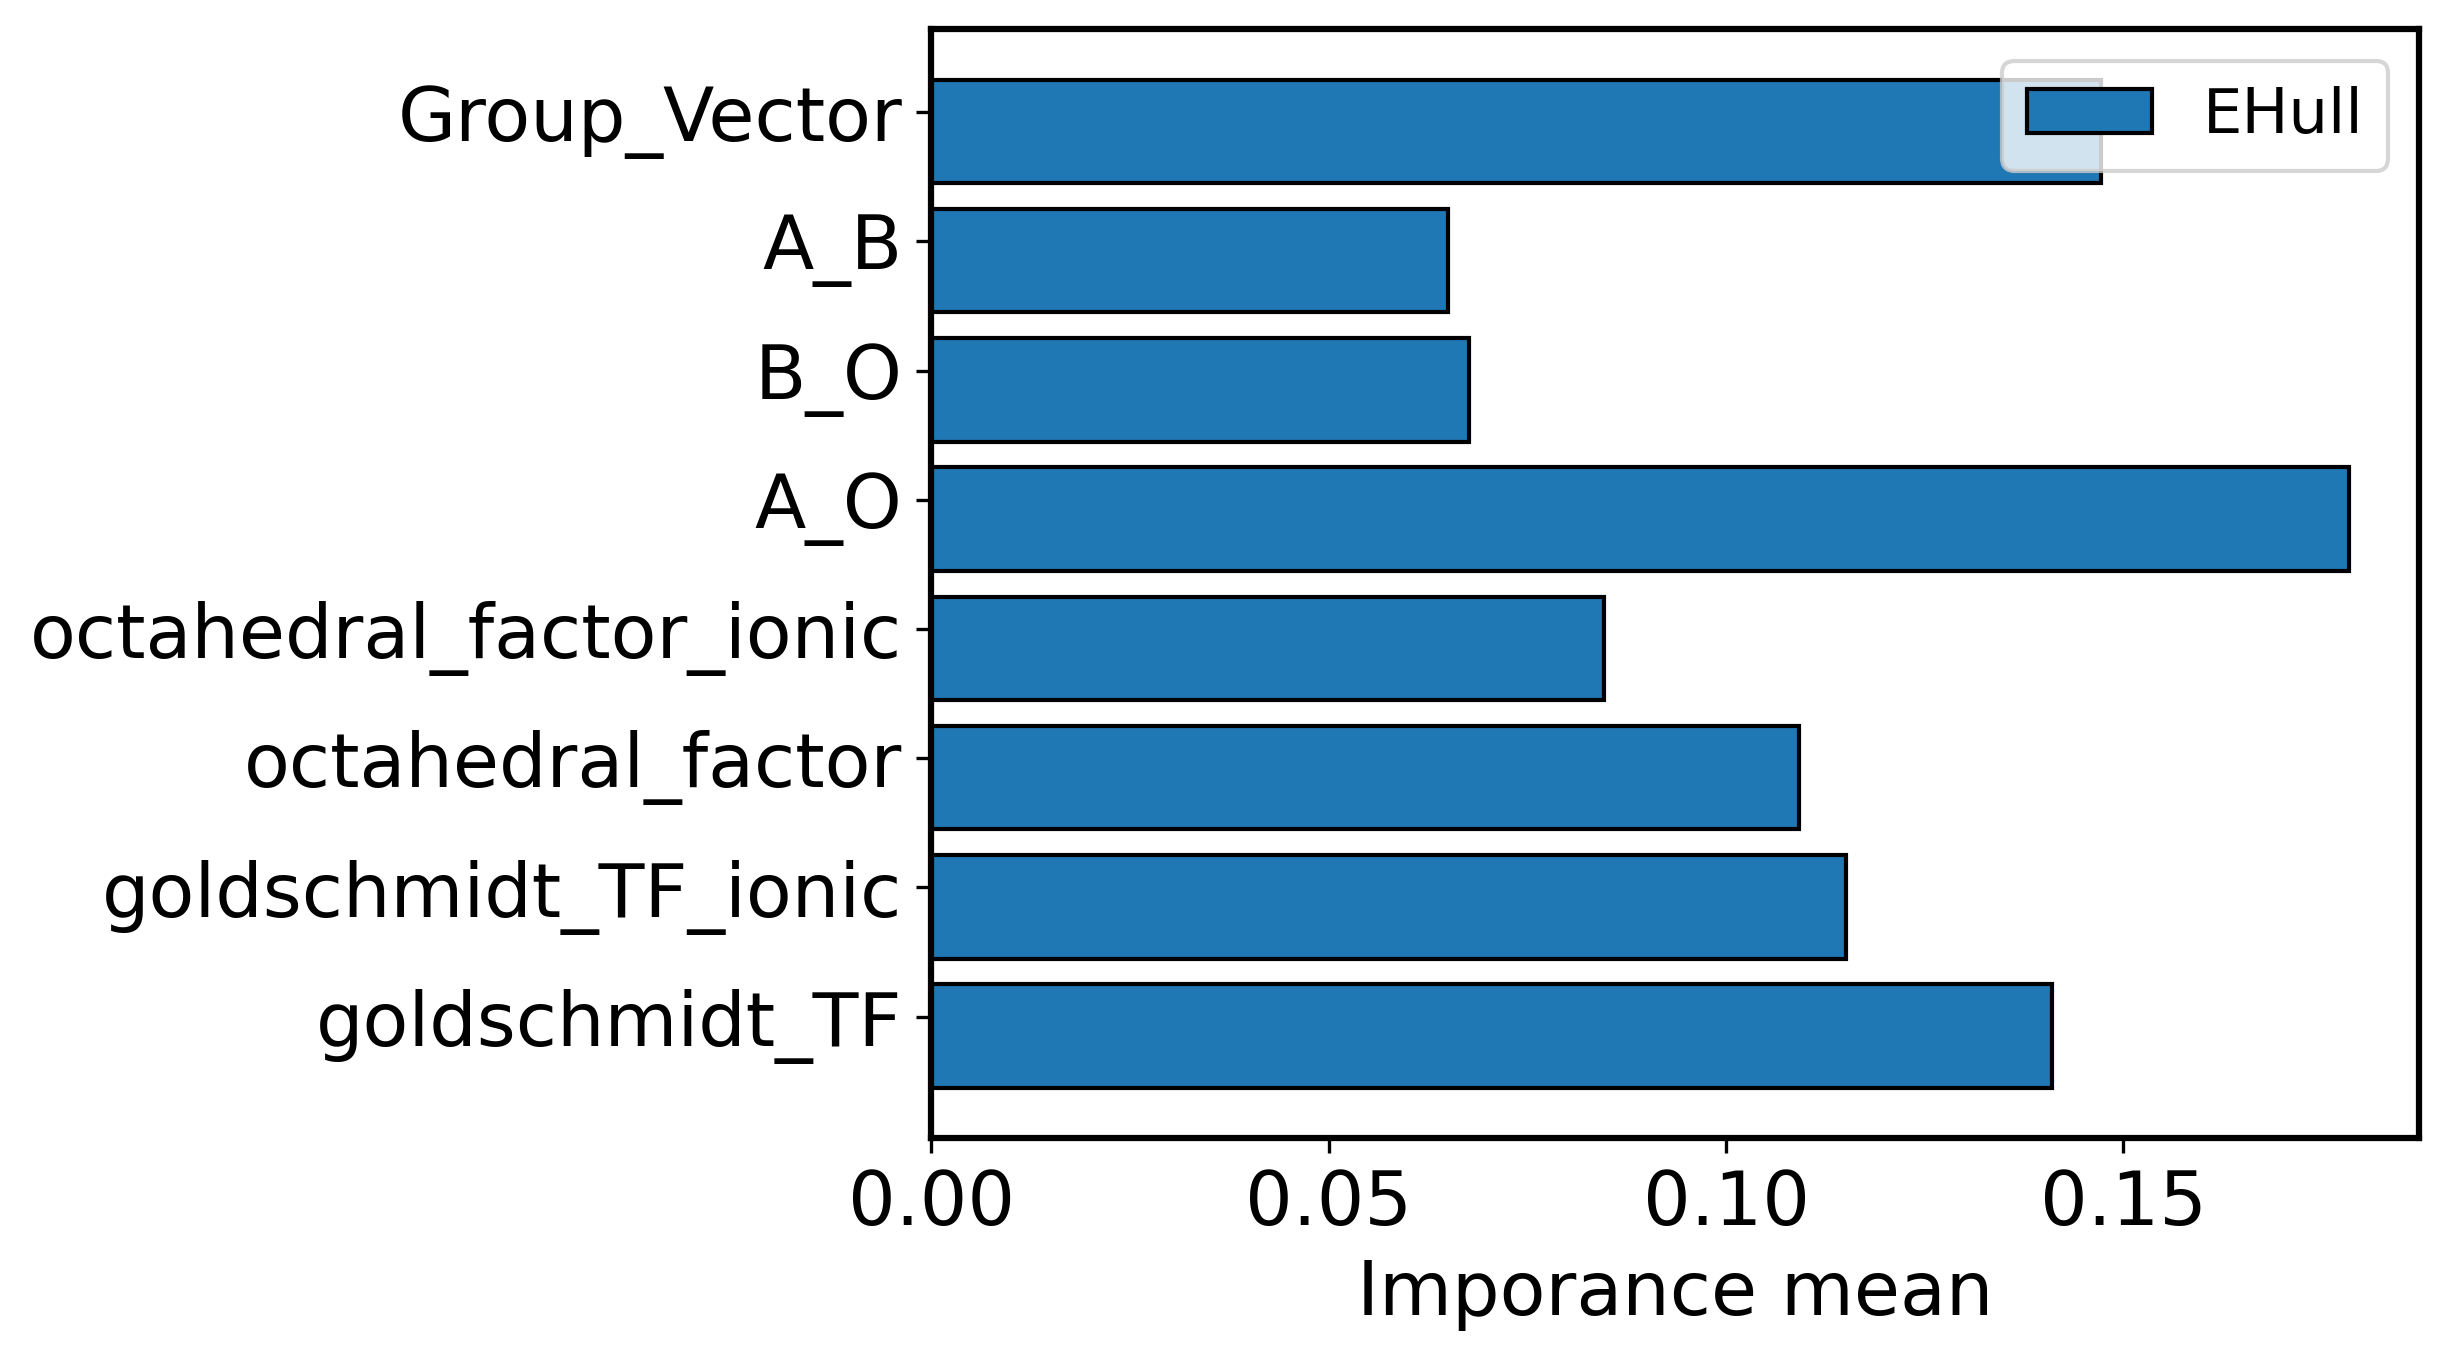

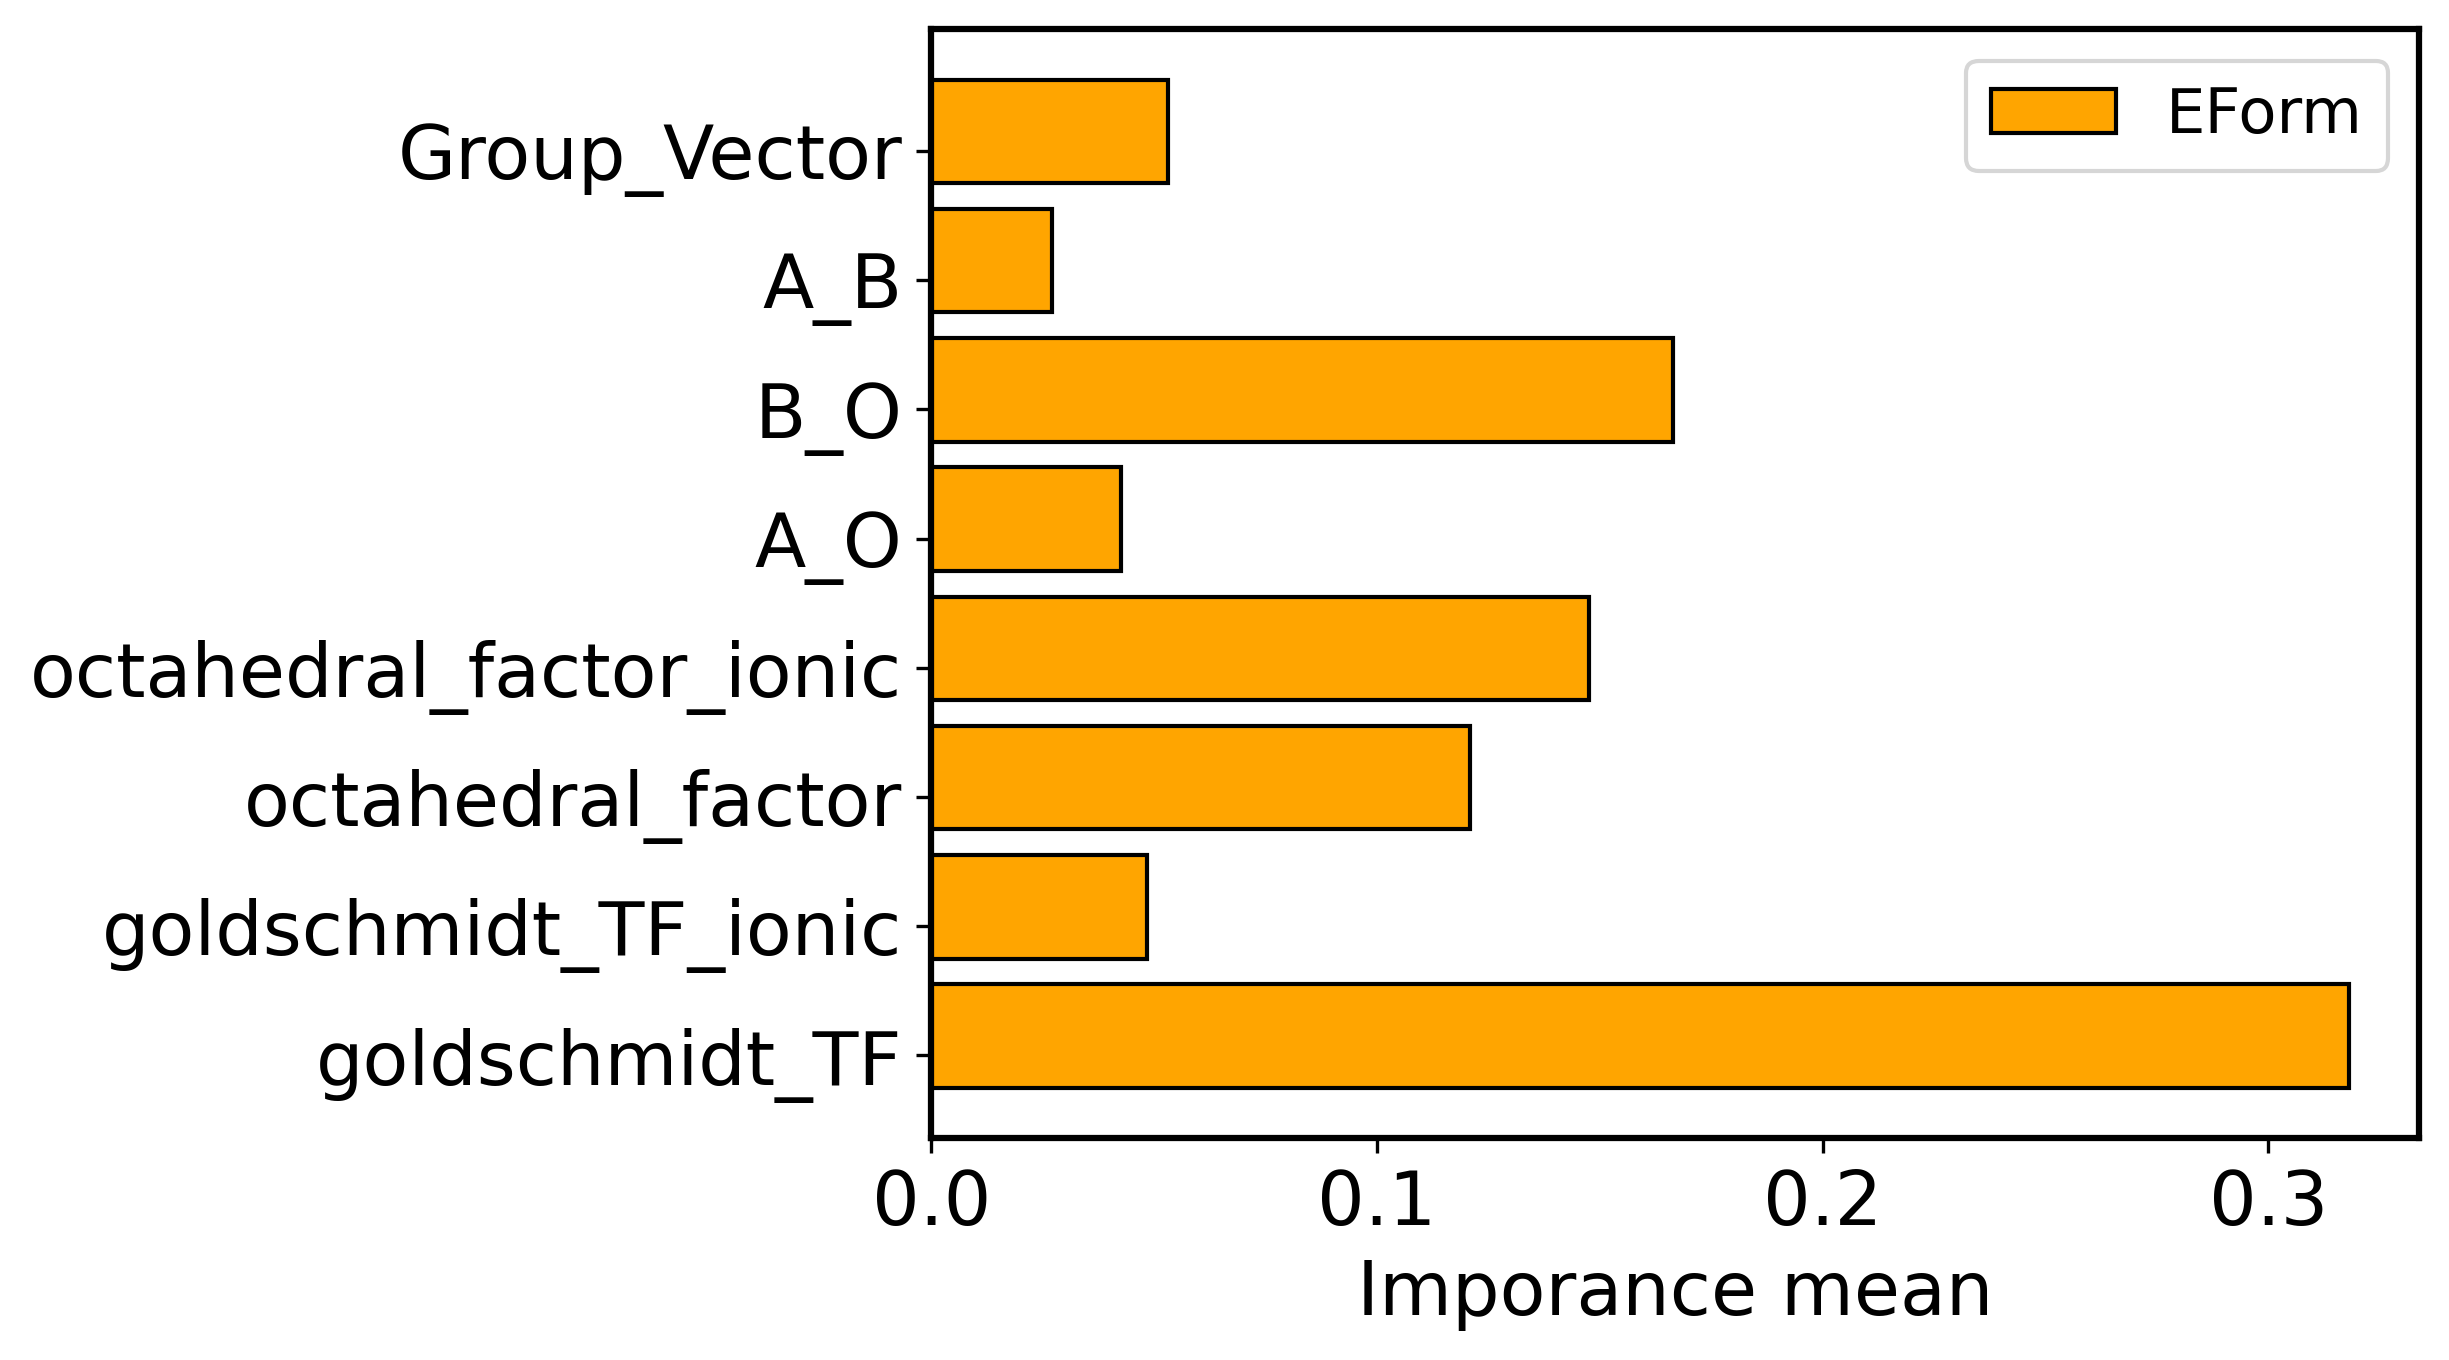

In [32]:

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 18
## Plotting the importance with the group vector for EHull and EForm as the responses
##respectively
#pred_mat_nl.columns.values[6]="Group_vector"

labs = pred_mat_nl.columns.to_list()
labs[7]='Group_Vector'
  
X_axis = np.arange(len(labs))
  

plt.subplot(1,1,1)
plt.barh(X_axis-0.15,result_hull.importances_mean,label='EHull',edgecolor = 'black',height=0.8) ## Regressing with EHull
plt.yticks(X_axis, labs,rotation = 0,fontsize=18)
plt.xlabel("Imporance mean")
plt.legend(fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
plt.show()
    

plt.subplot(1,1,1)  
plt.barh(X_axis+0.15,result_form.importances_mean,label='EForm',edgecolor = 'black',height=0.8,color="orange") # Regressing with EForm
plt.yticks(X_axis, labs,rotation = 0,fontsize=18)
plt.xlabel("Imporance mean")
plt.legend(fontsize=15)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)


plt.show()



In [9]:
## To separate and then get the variable importance
#ideally grp_vect_new_hull = grp_vect_new_form, when finalised with the code we can merge the two 
#followed by other removal of redundant variables. Here they are separated for debugging purposes ind2f=ind2h

pred_mat_nl=pd.DataFrame(np.append(np.matrix(ytsc_new.iloc[:,0:]),grp_vect_new.iloc[:,1:],axis=1),columns=np.append(ytsc_new.columns[0:],grp_vect_new.columns[1:]))


ind2,ind3=np.where(grp_vect_new.iloc[:,1]==0),np.where(grp_vect_new.iloc[:,1]==1)


new_pdmat_0=pd.DataFrame(np.matrix(pred_mat_nl.iloc[ind2])[:,0:7],columns=pred_mat_nl.columns[0:7])
new_pdmat_1=pd.DataFrame(np.matrix(pred_mat_nl.iloc[ind3])[:,0:7],columns=pred_mat_nl.columns[0:7])


result_form_0={}
result_hull_0={}

result_form_1={}
result_hull_1={}

result_form_0=random_forest_lanth(new_pdmat_0,ynew_scaled_form.iloc[ind2])
result_form_1=random_forest_lanth(new_pdmat_1,ynew_scaled_form.iloc[ind3])


result_hull_0=random_forest_lanth(new_pdmat_0,ynew_scaled_hull.iloc[ind2])
result_hull_1=random_forest_lanth(new_pdmat_1,ynew_scaled_hull.iloc[ind3])


In [48]:
pred_mat_nl.columns.values[0:7]

array(['goldschmidt_TF', 'goldschmidt_TF_ionic', 'octahedral_factor',
       'octahedral_factor_ionic', 'A_O', 'B_O', 'A_B'], dtype=object)

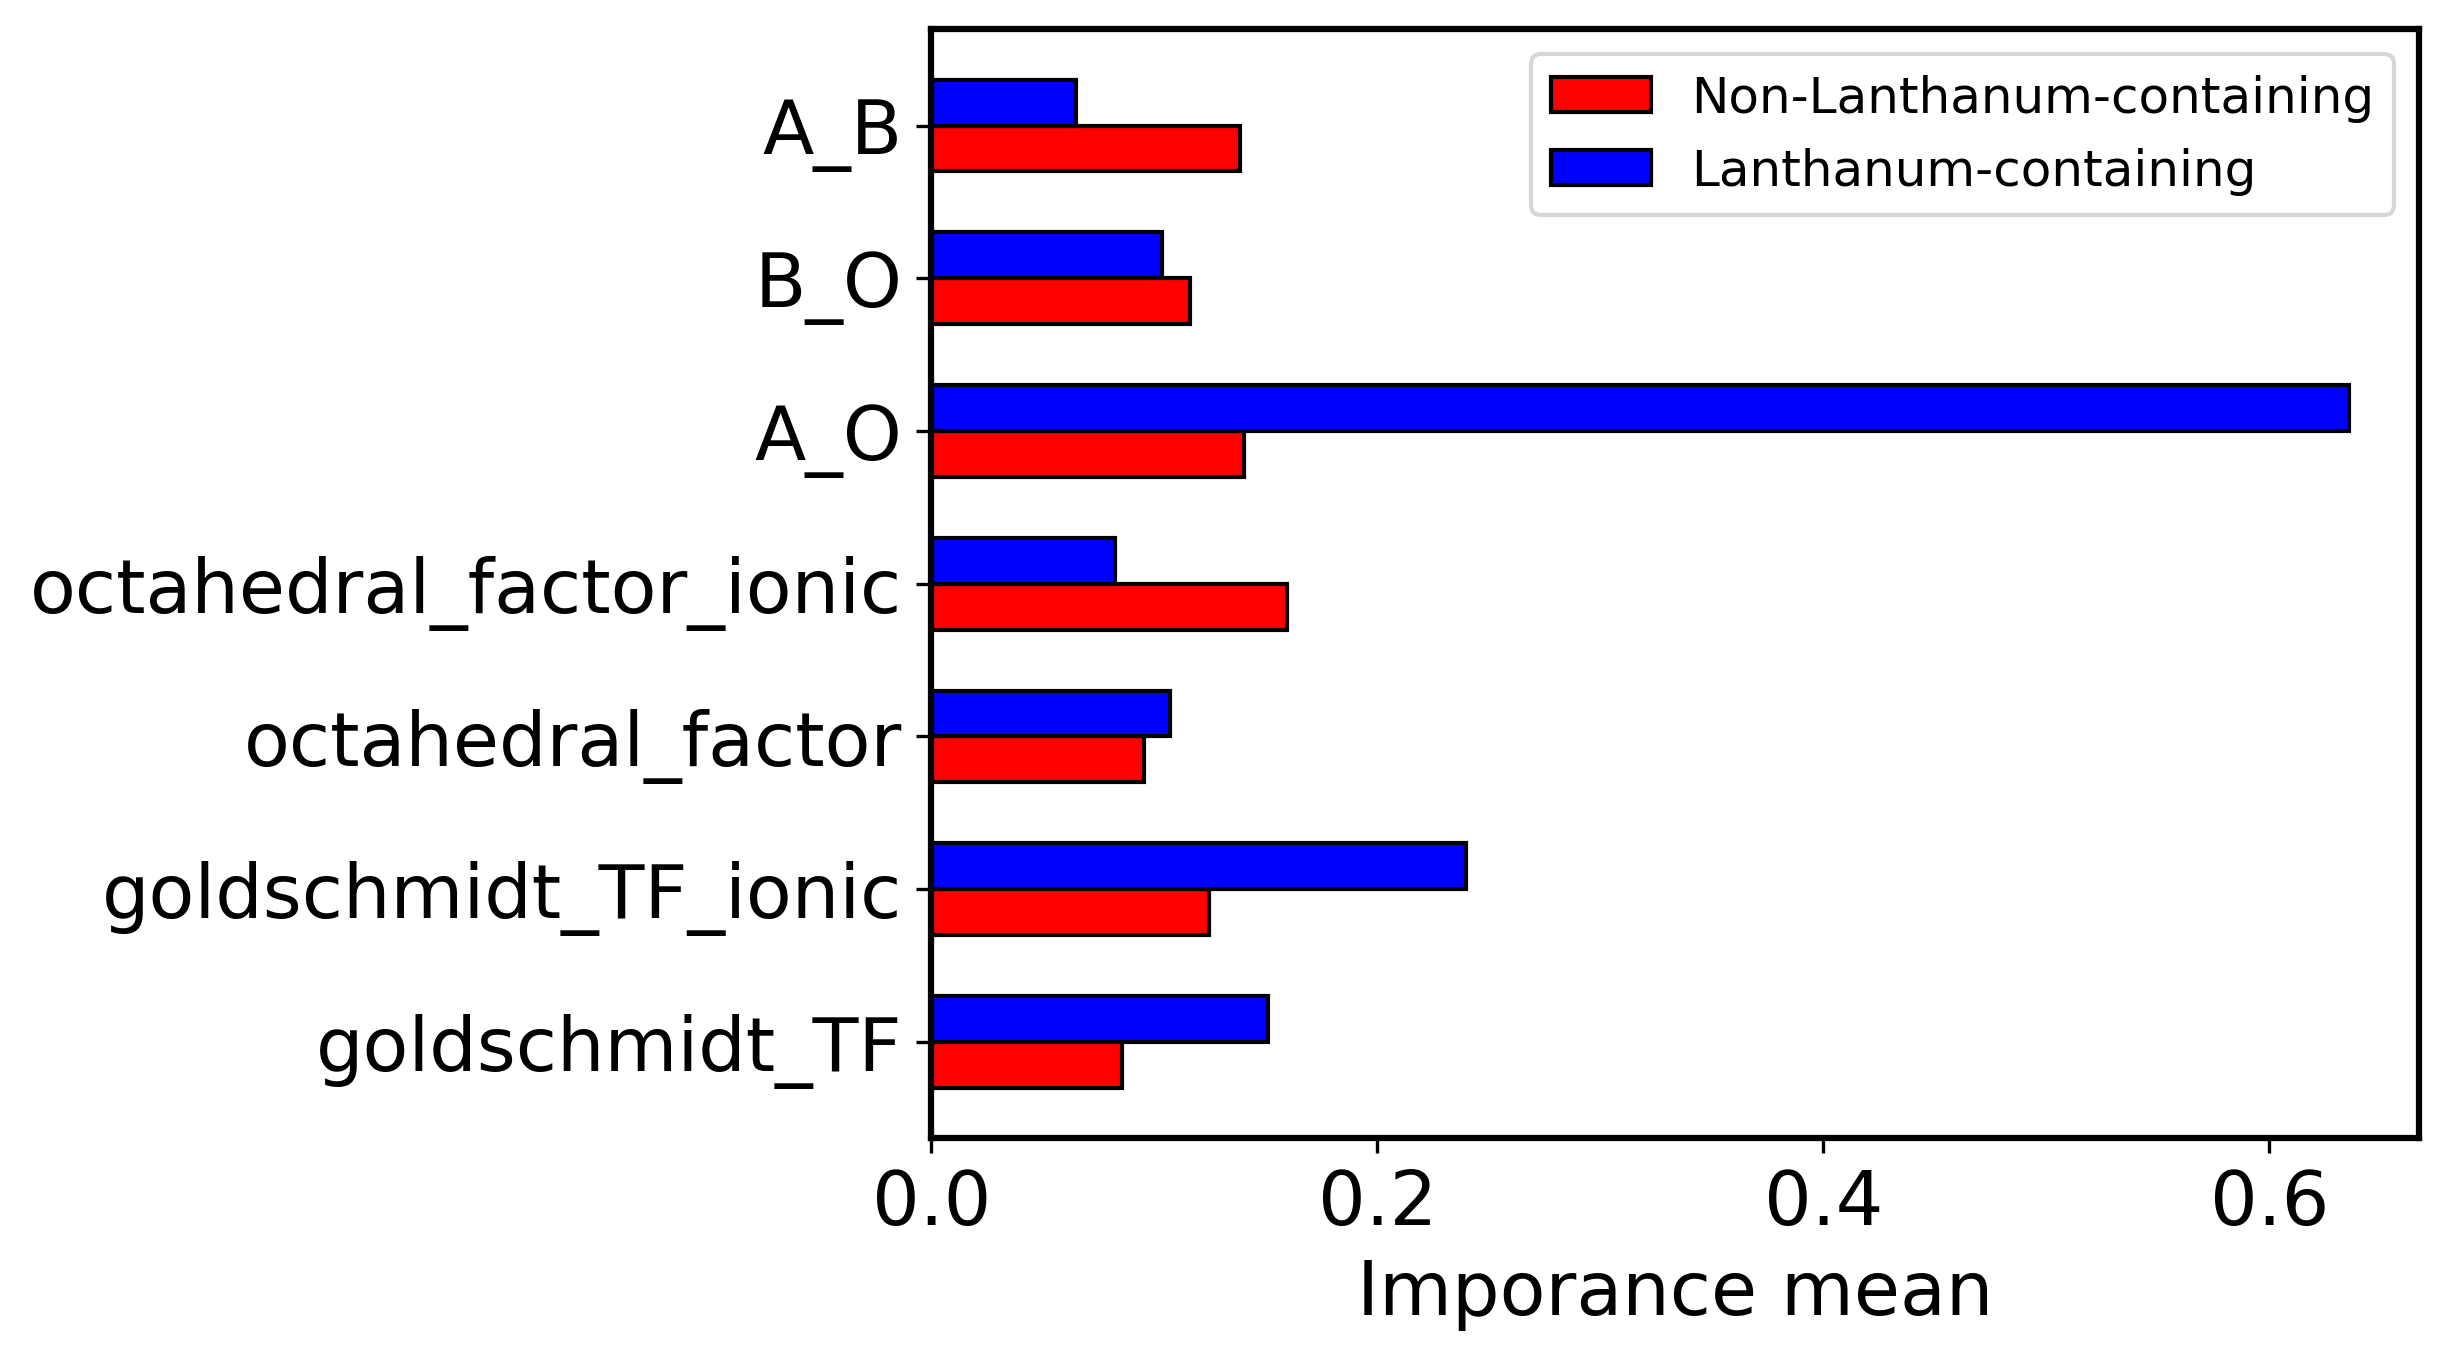

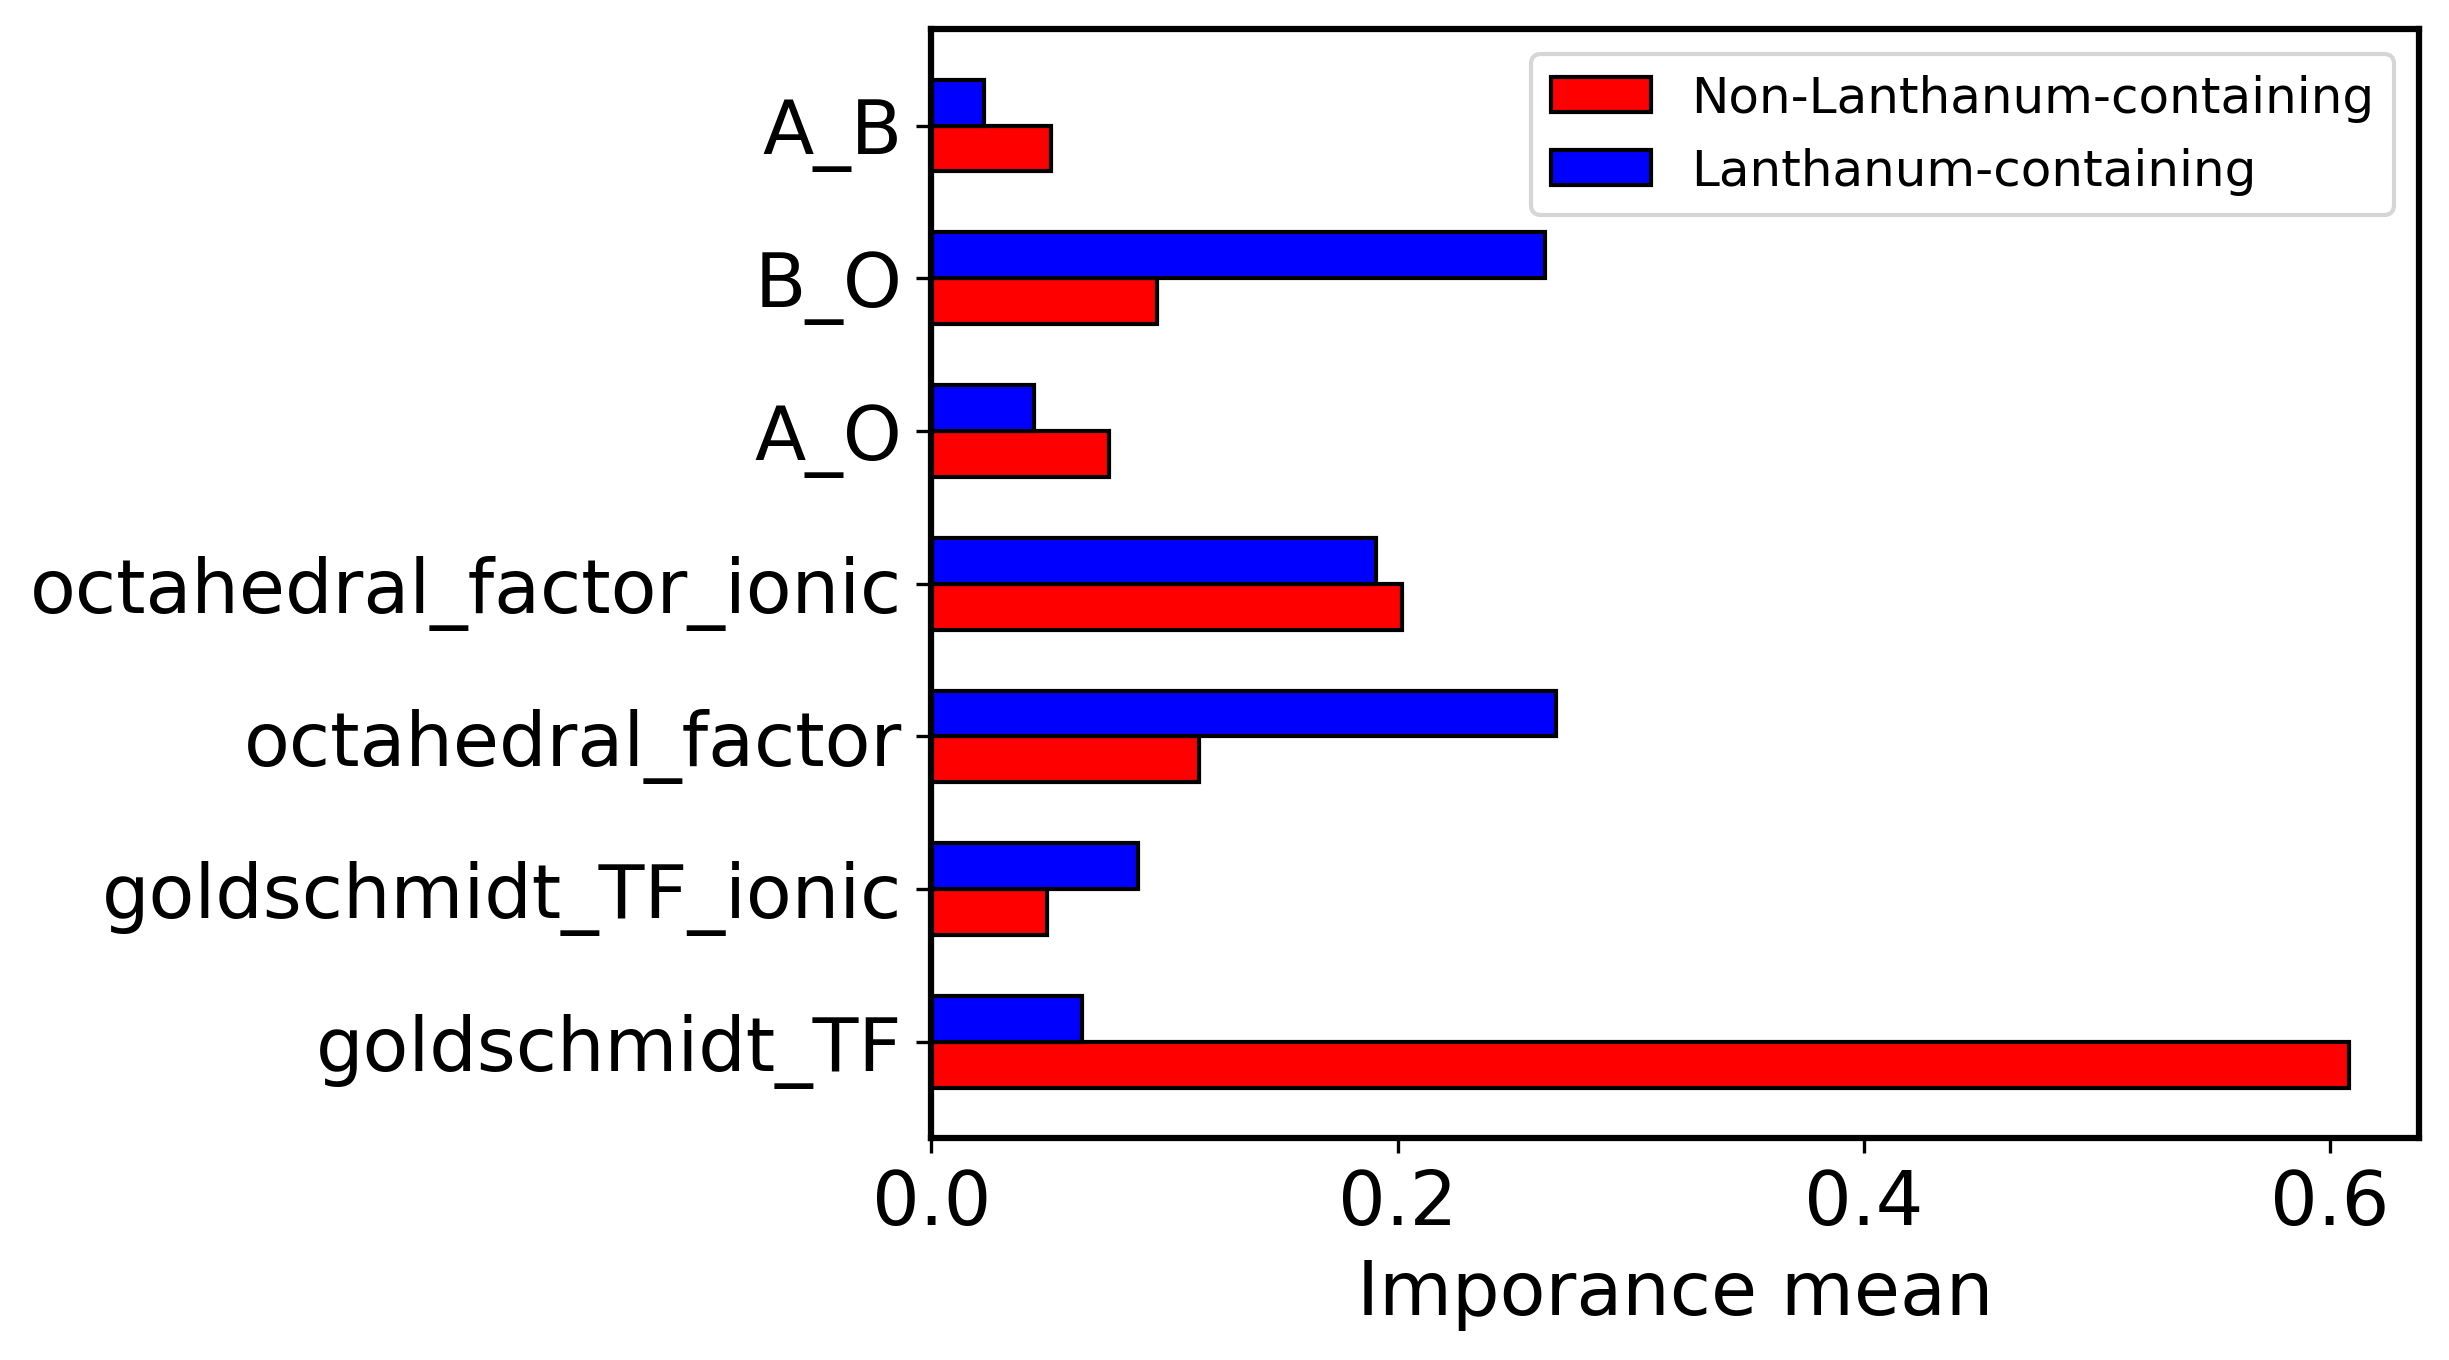

In [27]:
import matplotlib.pyplot as plt

## Plotting the four importances for lanthanide and non-lanthanide sub structure
## with EHull and EForm as responses respectively

labs = pred_mat_nl.columns.values[0:7]
  
X_axis = np.arange(len(labs))


plt.barh(X_axis-0.15,result_hull_0.importances_mean,edgecolor = 'black',height=0.3,
         label="Non-Lanthanum-containing",color='red')
plt.barh(X_axis+0.15,result_hull_1.importances_mean,edgecolor = 'black',height=0.3,
         label="Lanthanum-containing",color='blue')
plt.yticks(X_axis, labs,rotation = 0,fontsize=18)
plt.xlabel("Imporance mean")

plt.legend(loc='best',fontsize=12)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

plt.show()

plt.barh(X_axis-0.15,result_form_0.importances_mean,edgecolor = 'black',height=0.3,
         label="Non-Lanthanum-containing",color='red')
plt.barh(X_axis+0.15,result_form_1.importances_mean,edgecolor = 'black',height=0.3,
         label="Lanthanum-containing",color='blue')
plt.yticks(X_axis, labs,rotation = 0,fontsize=18)
plt.xlabel("Imporance mean")
plt.legend(loc='best',fontsize=12)
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)




plt.show()




In [155]:
# Ordering the varibale importance

display(new_pdmat_0.columns[result_form_0.importances_mean.argsort()[::-1][:20]])
display(new_pdmat_0.columns[result_hull_0.importances_mean.argsort()[::-1][:20]])
display(new_pdmat_1.columns[result_form_1.importances_mean.argsort()[::-1][:20]])
display(new_pdmat_1.columns[result_hull_1.importances_mean.argsort()[::-1][:20]])

Index(['A_O', 'octahedral_factor_ionic', 'octahedral_factor', 'B_O', 'A_B',
       'goldschmidt_TF_ionic'],
      dtype='object')

Index(['A_O', 'octahedral_factor_ionic', 'octahedral_factor', 'B_O', 'A_B',
       'goldschmidt_TF_ionic'],
      dtype='object')

Index(['B_O', 'octahedral_factor', 'octahedral_factor_ionic',
       'goldschmidt_TF_ionic', 'A_O', 'A_B'],
      dtype='object')

Index(['A_O', 'goldschmidt_TF_ionic', 'octahedral_factor', 'B_O',
       'octahedral_factor_ionic', 'A_B'],
      dtype='object')

In [161]:
#For non lanthanides and non lanthanides the importance means with Ehull and EForm as the responses

## Non Lanthanides
display(pd.DataFrame({'sorted_mean_form':result_form_0.importances_mean[result_form_0.importances_mean.argsort()[::-1][:20]],'sorted_variab_form':new_pdmat_0.columns[result_form_0.importances_mean.argsort()[::-1][:20]],
                 'sorted_mean_hull':result_hull_0.importances_mean[result_hull_0.importances_mean.argsort()[::-1][:20]],'sorted_variab_hull':new_pdmat_0.columns[result_hull_0.importances_mean.argsort()[::-1][:20]]}))
## Lanthanides
display(pd.DataFrame({'sorted_mean_form':result_form_1.importances_mean[result_form_1.importances_mean.argsort()[::-1][:20]],'sorted_variab_form':new_pdmat_1.columns[result_form_1.importances_mean.argsort()[::-1][:20]],
                 'sorted_mean_hull':result_hull_1.importances_mean[result_hull_1.importances_mean.argsort()[::-1][:20]],'sorted_variab_hull':new_pdmat_1.columns[result_hull_1.importances_mean.argsort()[::-1][:20]]}))


,sorted_mean_form,sorted_variab_form,sorted_mean_hull,sorted_variab_hull
0,0.622831,A_O,0.193897,A_O
1,0.225675,octahedral_factor_ionic,0.148694,octahedral_factor_ionic
2,0.209744,octahedral_factor,0.108855,octahedral_factor
3,0.098273,B_O,0.096166,B_O
4,0.069755,A_B,0.091293,A_B
5,0.051967,goldschmidt_TF_ionic,0.080082,goldschmidt_TF_ionic


,sorted_mean_form,sorted_variab_form,sorted_mean_hull,sorted_variab_hull
0,0.344032,B_O,0.523646,A_O
1,0.282568,octahedral_factor,0.280128,goldschmidt_TF_ionic
2,0.201071,octahedral_factor_ionic,0.155972,octahedral_factor
3,0.094348,goldschmidt_TF_ionic,0.152434,B_O
4,0.084827,A_O,0.113488,octahedral_factor_ionic
5,0.025830,A_B,0.095498,A_B
